***
*Course:* Math 5545/CS 5590 - Mathematical Methods in Data Science (MMDS)  
***


## Coding Homework 3: The Fourier Transform and Filtering in the Frequency Domain

All problems can be solved using the FFT 2d related functions in `fft` package from `numpy`. All the codes to answer the questions in this homework can be found in the FFT2d lecture notebook on Canvas.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skimage
from skimage import data
from skimage.transform import resize
from skimage.color import rgb2gray
import cv2
import time
import numpy.fft as fft

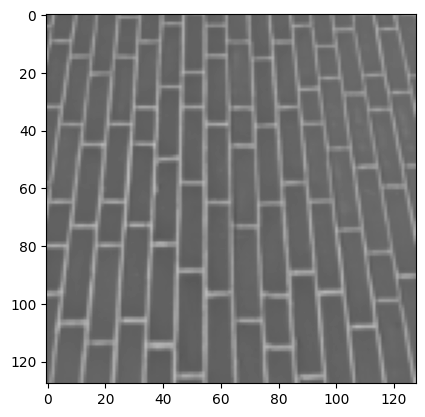

In [2]:
# Read and display sample image for problem 1
img = 255 * resize(data.brick(),(128,128))
# resize the image to a smaller size to reduce the computational time
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.show()

### Problem 1

Use the `numpy` function `fft.fft2`, `fft.fftshift`, `fft.ifftshift`, `fft.ifft2`, `np.linalg.norm` to complete the following tasks.

(Verifying the Parseval identity) compute the $L^2$ norm of the sample `img` above and compare with the $L^2$ norm of its discrete Fourier Transform $F(u,v)$. When using the correct normalization, read [the manual of `fft.fft2`](https://numpy.org/doc/stable/reference/generated/numpy.fft.fft2.html), they should equal. (Expected output: both are $14515.029888260298$)

In [9]:
# your code for
norm_spatial = np.linalg.norm(img) # replace None with the code to compute the norm for img
norm_fourier = np.linalg.norm(np.fft.fft2(img, norm='ortho')) # norm in the Fourier space
print(f"{norm_spatial:.5f}") # 14515.02989
print(np.allclose(norm_spatial, norm_fourier)) # expected output is True

14515.02989
True


### Problem 2: Verifying the convolution theorem

The objective of this problem is to show that filtering of an image by convolving it with a kernel
can be done in both spatial domain and frequency domain.

The output image is $g(x,y)$: for $(x,y)$ denotes the location of a pixel in an image

$$
g(x,y) = (h*f)(x,y) = \mathcal{F}^{-1}\{H(u,v)F(u,v)\}
$$

where $h(x,y)$ is a filter kernel in space, and $H(u,v)$ is its Fourier transform. $f(x,y)$ is the input image and $F(u,v)$ is its Fourier transform.

Complete the following function `filter_in_frequency_domain` that applies a filter to an image in the frequency domain. The function inputs are a grayscale image and a kernel, and the function output is the filtered image corresponding to the input image. You need to replace `None` with the code used in the lecture notebook. The kernel is the following matrix:

$$
h(x,y) = \begin{pmatrix} 0& -1 & 0\\
-1 & 4 & -1 \\ 0 & -1 & 0 \end{pmatrix}
$$

which is implemented as

> `h = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])`

Then plot the filtered image using the code below. Note this is called the Laplacian filter to extract the edges.

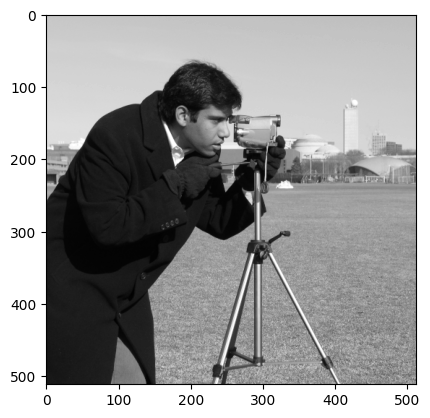

In [11]:
# Read and display the image
img = data.camera()
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.show()

In [14]:
def filter_in_frequency_domain(img, kernel):
  # compute the Fourier transform of the image
  F = fft.fft2(img)
  # compute the Fourier transform of the kernel
  H = fft.fft2(kernel, s=img.shape)
  # shift the Fourier transform of the image and the kernel
  Fs = fft.fftshift(F)
  Hs = fft.fftshift(H)
  # multiply the Fourier transform of the image and the kernel
  G_shifted = Fs * Hs
  # shift the Fourier transform of the product back
  G = fft.fftshift(G_shifted)
  # compute the inverse Fourier transform of the product
  g = fft.ifft2(G)
  # return the real part of the inverse Fourier transform
  return np.real(g)

In [21]:
h = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]]) # replace h with the filter in space
g = filter_in_frequency_domain(img, h)

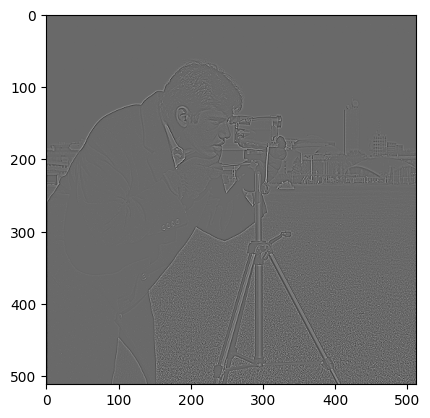

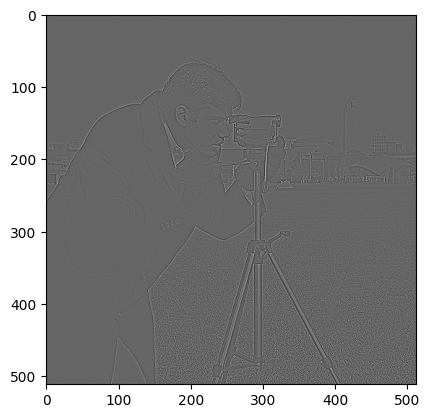

In [22]:
plt.imshow(g, cmap='gray')
plt.show()
g_compare = skimage.filters.laplace(img, ksize=3, mask=None)
plt.imshow(g_compare, cmap='gray')
plt.show()
# expected result: two images should be similar